In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_moons

In [21]:
x, y = make_moons(n_samples=1000, noise=0.2)

In [22]:
x

array([[ 1.61118332,  0.15751429],
       [ 0.93875474,  0.3035421 ],
       [-0.75298614,  0.62108845],
       ...,
       [ 0.81569285, -0.67046833],
       [ 0.89172009, -0.19677321],
       [-0.35882488,  0.53929875]])

In [23]:
df  = {"x1":x[:,0], "x2":x[:,1], "y":y}

In [24]:
dataset = pd.DataFrame(df)

In [25]:
dataset

,x1,x2,y
0,1.611183,0.157514,1
1,0.938755,0.303542,0
2,-0.752986,0.621088,0
3,1.473578,-0.472332,1
4,0.159342,1.061194,0
...,...,...,...
995,0.644780,-0.210889,1
996,-0.512904,0.779614,0
997,0.815693,-0.670468,1
998,0.891720,-0.196773,0


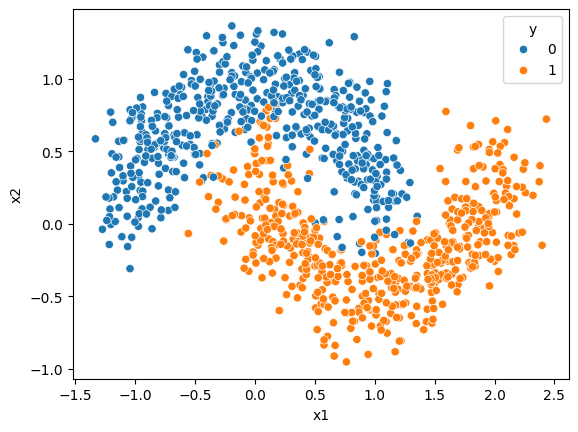

In [26]:
sns.scatterplot(x="x1", y="x2", data=dataset, hue="y")
plt.show()

In [27]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_a, y_a, test_size=0.2, random_state=42)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [31]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100

(100.0, 95.5)

In [33]:
sv = SVC()
sv.fit(x_train, y_train)
sv.score(x_train, y_train)*100, sv.score(x_test, y_test)*100

(96.125, 96.0)

In [34]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_train, y_train)*100, gnb.score(x_test, y_test)*100

(87.5, 87.0)

In [35]:
from sklearn.ensemble import VotingClassifier

In [37]:
li = [("dt1", DecisionTreeClassifier()), ("sv1", SVC()), ("gnb1", GaussianNB())]

In [38]:
vc = VotingClassifier(estimators=li)
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())])

In [39]:
vc.score(x_train, y_train)*100, vc.score(x_test, y_test)*100

(96.5, 95.5)

In [40]:
prd = {"dt": dt.predict(x_test), "svm": sv.predict(x_test), "gnb": gnb.predict(x_test), "vc": vc.predict(x_test)}

In [41]:
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,0,0,0,0
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
195,1,1,1,1
196,1,1,0,1
197,1,1,1,1
198,1,1,1,1
